# City Size Distribuion

This notebook contains analysis and visualizations for:

1. Investigating the distribution of sizes of African cities, towns, and villages.
2. Determining how these distributions have changed over the period 2000-2020.
3. Examining the trajectoris of individuals cities or groups of cities

In [1]:
# Read in the data.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

working_directory = "../../temp_data/"

In [26]:
def p_X_gt_x(data, X=None):
    n_data = len(data)
    if X is None:
        X = data.unique()
    return X, pd.Series([sum(data>=x)/n_data for x in X ])

def p_X_lt_x(data, X=None):
    n_data = len(data)
    if X is None:
        X = data.unique()
    return X, pd.Series([sum(data<=x)/n_data for x in X ])

## 2000 World Pop Data

In [54]:
data_file = '20181205_GRUMP2015_zone_pop.csv'
variable = 'GRUMP2015_PopTot'
year = 2000

In [46]:
df.head(6)

,Unnamed: 0,osm_id,FID,geometry,GRUMP2000_PopTot
0,0,27564946,260,"POLYGON ((6.491667 36.466667, 6.5 36.466667, 6...",5.542145e+05
1,1,27565103,497,"POLYGON ((-0.566667 35.775, -0.55 35.775, -0.5...",9.321878e+05
2,2,262963217,1213,"POLYGON ((6.883333 33.433333, 6.9 33.433333, 6...",1.077895e+05
3,3,288387133,70,"POLYGON ((3.008333 36.825, 3.016667 36.825, 3....",3.015573e+06
4,4,288417925,292,"POLYGON ((2.75 36.341667, 2.758333 36.341667, ...",1.279876e+05
5,5,288418022,203,"POLYGON ((2.883333 36.616667, 2.9 36.616667, 2...",3.720047e+05


Text(0,0.5,'P[X>=x]')

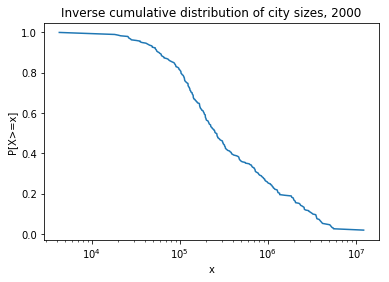

In [52]:
datafile = working_directory + data_file
df = pd.read_csv(datafile)
df = df[df[variable] >= 0]  # Remove any cities that have populations less than zero (caused by raster -9999 masking)

# Generate the inverse cumulative distribution plot for 2000
data_2000 = df[variable].sort_values()
X, y = p_X_gt_x(data_2000)

rank_2000 = df[variable].rank

# Render the inverse cumulative distribution plot for 2000
plt.plot(X,y)
plt.xscale('log')
plt.title('Inverse cumulative distribution of city sizes, {year}'.format(year=year))
plt.xlabel('x')
plt.ylabel('P[X>=x]')

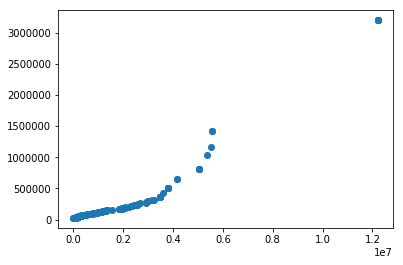

In [55]:
maxpop = df[variable].max()
rank_2000 = df[variable].rank(ascending = False)
type(rank_2000)
pop_est = 1/pow(rank_2000.astype(float),1.07)*maxpop
plt.scatter(df[variable], pop_est)
xy_line = (0, 1)

# Y is pop estiamte based on the the rank of the city, x is measured population 
# can't say how individual cities are growing, but because of alg., so we are looking 
# at changes in distrubution over time

In [ ]:
rank_2000

# 2020 World Pop Data

In [ ]:
data_file = '20181116_WP2020_pops.csv'
variable = 'Wpop2020'
year = 2020

Text(0,0.5,'P[X>=x]')

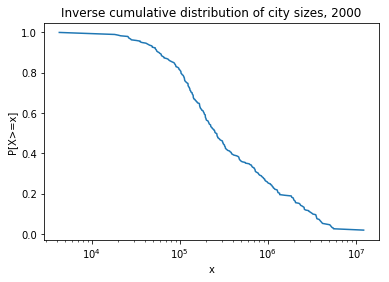

In [56]:
datafile = working_directory + data_file
df = pd.read_csv(datafile)

df = df[df[variable] >= 0]  # Remove any cities that have populations less than zero (caused by raster -9999 masking)

# Generate the inverse cumulative distribution plot
data_2020 = df[variable].sort_values()
X, y = p_X_gt_x(data_2020)

# Render the inverse cumulative distribution plot for 2000
plt.plot(X,y)
plt.xscale('log')
plt.title('Inverse cumulative distribution of city sizes, {year}'.format(year=year))
plt.xlabel('x')
plt.ylabel('P[X>=x]')

## Change detection in inverse cdfs

In [ ]:
from math import log10, floor, ceil

max_data = ceil(log10(max(max(data_2020),max(data_2000))))  # Find the minimum log scale in the data
min_data = floor(log10(min(min(data_2020),min(data_2000)))) # Find the maximum log scale in the data

values = [pow(10,x) for x in np.arange(min_data,max_data,0.25)] # Generate a list of values for the inverse cdf.

X, y1 = p_X_gt_x(data_2000, X=values)
X, y2 = p_X_gt_x(data_2020, X=values)

plt.plot(X,y2-y1)
plt.xscale('log')
plt.title('Change in Inverse Cumulative Distribution Function')
plt.xlabel('City Size')
plt.ylabel('2020-2000')

X, y1 = p_X_lt_x(data_2000, X=values)
X, y2 = p_X_lt_x(data_2020, X=values)

plt.plot(X,y2-y1)
plt.xscale('log')
plt.title('Change in Cumulative Distribution Function')
plt.xlabel('City Size')
plt.ylabel('2020-2000')

In [ ]:
plt.plot(X, y1)
plt.plot(X, y2)
plt.xscale('log')
plt.title('Cumulative Distribution Function')
plt.xlabel('City Size, C')
plt.ylabel('P[c<=C]')
plt.legend(['2000','2020'])